In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

logging.basicConfig(level=logging.WARNING)
# logging.basicConfig(level=logging.DEBUG)
import shnitsel as st

## Basic datasheet test

In [2]:
from shnitsel.data.tree import CompoundInfo
from shnitsel.data.tree import ShnitselDB
from shnitsel.data.dataset_containers import Trajectory


def set_charge(traj: Trajectory, charge):
    traj.charge = charge
    return traj


# shnitsel_db_single_nx: Trajectory = st.io.read(
#     'test_data/newtonx/test_I01_v2.6/', parallel=False
# )  # type: ignore
shnitsel_db_single_nx: ShnitselDB = st.io.read(
    'test_data/playground/TRAJECTORIES/', parallel=True
)  # type: ignore

shnitsel_db_retinal: ShnitselDB = st.io.read('tut_data/traj_I02.nc', parallel=True)  # type: ignore

shnitsel_db_retinal = shnitsel_db_retinal.map_data(lambda t: set_charge(t, 1))


# shnitsel_db_single_nx = set_charges(shnitsel_db_single_nx)

# # shnitsel_db_full_newtonx = shnitsel_db_full_newtonx.map_over_trajectories(set_charges)  # type: ignore
# shnitsel_db_full_newtonx = shnitsel_db_full.map_over_trajectories(set_charges)
# shnitsel_db_single_nx
# shnitsel_db_single_nx.isel(time=0,state=3).forces
# len(list(shnitsel_db_retinal.collect_data()))
shnitsel_db_retinal

  0%|          | 0/100 [00:00<?, ?it/s]

ShnitselDBRoot(_name='ROOT', _dtype=<class 'shnitsel.data.dataset_containers.trajectory.Trajectory'>, _data=None, _children={'I02': CompoundGroup(_name='I02', _dtype=<class 'shnitsel.data.dataset_containers.trajectory.Trajectory'>, _data=None, _children={'0': DataLeaf(_name='0', _dtype=<class 'shnitsel.data.dataset_containers.trajectory.Trajectory'>, _data=Trajectory(_raw_dataset=<xarray.DatasetView> Size: 338kB
Dimensions:              (time: 384, state: 3, atom: 14, direction: 3,
                          statecomb: 3, full_statecomb: 6)
Coordinates: (12/15)
  * time                 (time) float64 3kB 0.0 0.5 1.0 ... 190.5 191.0 191.5
  * state                (state) int64 24B 1 2 3
  * atom                 (atom) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13
  * direction            (direction) <U1 12B 'x' 'y' 'z'
  * statecomb            (statecomb) object 24B MultiIndex
  * full_statecomb       (full_statecomb) object 48B MultiIndex
    ...                   ...
    atNames          

In [3]:
from shnitsel.data.shnitsel_db.db_function_decorator import concat_subtree
from shnitsel.filtering.structure_selection import StructureSelection

concatted_tree = concat_subtree(shnitsel_db_retinal)
frame = concatted_tree.isel(frame=0).squeeze()
sel = StructureSelection.init_from_dataset(concatted_tree, default_selection=['angles'])

from shnitsel.geo.geocalc_.bla_chromophor import get_max_chromophor_BLA

res_sel = sel.select_all(['atoms', 'bonds'])


res = get_max_chromophor_BLA(concatted_tree.atXYZ, structure_selection=res_sel)
res

<xarray.DataArray 'atXYZ' (frame: 6452)> Size: 26kB
array([0.10997677, 0.10950518, 0.10680151, ..., 0.14393115, 0.15356755,
       0.16359758], shape=(6452,), dtype=float32)
Coordinates:
  * frame        (frame) object 52kB MultiIndex
  * atrajectory  (frame) int32 26kB 1 1 1 1 1 1 1 1 ... 20 20 20 20 20 20 20 20
  * time         (frame) float64 52kB 0.0 0.5 1.0 1.5 ... 218.0 218.5 219.0
Attributes:
    long_name:   Positions
    unitdim:     length
    units:       Bohr
    __assigned:  True

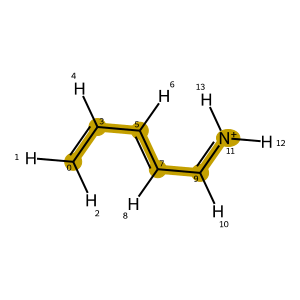

In [4]:
res_sel.select_BLA_chromophor().draw(flag_level=2)

In [5]:
from shnitsel.data.shnitsel_db.db_function_decorator import concat_subtree
from shnitsel.filtering.structure_selection import StructureSelection

concatted_tree = concat_subtree(shnitsel_db_single_nx)
frame = concatted_tree.isel(frame=0).squeeze()
sel = StructureSelection.init_from_dataset(frame, default_selection=['angles'])

from shnitsel.geo.geocalc_.bla_chromophor import get_max_chromophor_BLA

res_sel = sel.select_all(['atoms', 'bonds'])


res = get_max_chromophor_BLA(concatted_tree.atXYZ)
res

<xarray.DataArray 'atXYZ' (frame: 20100)> Size: 161kB
array([-0.02272949, -0.02260822, -0.02163931, ...,  0.13098174,
        0.11193068,  0.09176784], shape=(20100,))
Coordinates:
  * frame        (frame) object 161kB MultiIndex
  * atrajectory  (frame) int32 80kB 1 1 1 1 1 1 1 ... 100 100 100 100 100 100
  * time         (frame) float64 161kB 0.0 0.5 1.0 1.5 ... 98.5 99.0 99.5 100.0
Attributes:
    long_name:  Positions
    unitdim:    length
    units:      Bohr
    unit:       Bohr

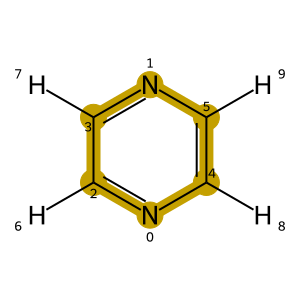

In [6]:
res_sel.select_BLA_chromophor().draw(flag_level=2)

In [ ]:
from shnitsel.geo.geocalc import get_bats
import xarray as xr
from shnitsel.filtering.structure_selection import StructureSelection

dataset_tmp = list(shnitsel_db_retinal.collect_data())[0]
structure_selection = StructureSelection.init_from_dataset(dataset_tmp).select_bats(
    idxs=()
)

bats_data = get_bats(shnitsel_db_retinal, structure_selection=structure_selection)

xr.concat(bats_data.collect_data(), dim='time')

<xarray.DataArray 'atXYZ' (descriptor: 51, time: 6452)> Size: 1MB
array([[  2.0435584,   2.0289316,   2.01827  , ...,   2.0910697,
          2.056782 ,   2.0240216],
       [  1.9179103,   1.9718978,   2.0327592, ...,   2.056254 ,
          2.0703726,   2.0862246],
       [  2.2374716,   2.270294 ,   2.2873135, ...,   2.112374 ,
          2.0104063,   1.9165636],
       ...,
       [179.13747  , 179.80922  , 178.81535  , ..., 161.6689   ,
        164.05057  , 166.62798  ],
       [  9.621631 ,   8.757821 ,   7.8963766, ...,   6.1778398,
          1.0744718,   4.013516 ],
       [169.22687  , 167.24527  , 165.33797  , ..., 162.2622   ,
        161.25931  , 160.49165  ]], shape=(51, 6452), dtype=float32)
Coordinates:
  * descriptor       (descriptor) <U15 3kB 'dist(0,1)' ... 'dih(1,0,3,4)'
  * time             (time) float64 52kB 0.0 0.5 1.0 1.5 ... 218.0 218.5 219.0
    descriptor_tex   (descriptor) <U20 4kB '|\\vec{r}_{0,1}|' ... '\\varphi_{...
  * descriptor_type  (descriptor) <U5 1kB 'dist' 'dist' 'dist' ... 'dih' 'dih'
  * feature_indices  (descriptor) object 408B (np.int64(0), np.int64(1)) ... ...
Attributes:
    long_name:   Positions
    unitdim:     length
    units:       Bohr
    __assigned:  True

In [ ]:
from shnitsel.clean import sanity_check
from shnitsel.clean.filter_geo import GeometryFiltrationThresholds

geo_thresholds = GeometryFiltrationThresholds()
geo_thresholds.length_unit = 'angstrom'
geo_thresholds.match_thresholds["[#6][#1]"] = 2.0

# print(shnitsel_db_retinal)

shnitsel_db_retinal_filtered = sanity_check(
    shnitsel_db_retinal, 'truncate', geometry_thresholds=geo_thresholds
)

pre_filter: <xarray.DataArray 'astate' (time: 384)> Size: 2kB
array([2, 2, 2, ..., 1, 1, 1], shape=(384,), dtype=int32)
Coordinates:
  * time     (time) float64 3kB 0.0 0.5 1.0 1.5 2.0 ... 190.0 190.5 191.0 191.5
Attributes:
    long_name:   Active state in dynamic trajectories (MCH)
    __assigned:  True
analysis_data.active_state=<xarray.DataArray 'astate' (time: 384)> Size: 2kB
array([2, 2, 2, ..., 1, 1, 1], shape=(384,), dtype=int32)
Coordinates:
  * time     (time) float64 3kB 0.0 0.5 1.0 1.5 2.0 ... 190.0 190.5 191.0 191.5
Attributes:
    long_name:   Active state in dynamic trajectories (MCH)
    __assigned:  True
filtered_frames.active_state=<xarray.DataArray 'astate' (time: 384)> Size: 2kB
array([2, 2, 2, ..., 1, 1, 1], shape=(384,), dtype=int32)
Coordinates:
  * time     (time) float64 3kB 0.0 0.5 1.0 1.5 2.0 ... 190.0 190.5 191.0 191.5
Attributes:
    long_name:   Active state in dynamic trajectories (MCH)
    __assigned:  True
filter_res.active_state=<xarray.DataArray 'asta

SystemExit: 1

/home/tpadmin/git/shnitsel-tools-official/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Rendering coupling page for 3 states with at least 3 relevant state transitions.


100%|██████████| 3/3 [00:00<00:00, 383.45it/s]


[ 0.00840836 -0.02309847  0.05008216  0.01815273  0.0009214  -0.06388968
  0.12508727 -0.02100428  0.18669249  0.18478471  0.18602533  0.13055964
  0.18149903 -0.00552452  0.03069716  0.0233411   0.00890023 -0.06754414
  0.10358321  0.0674664   0.13133216  0.13339325  0.128216    0.10801093
  0.12505884  0.01398139  0.00572898 -0.00471851 -0.05320312  0.0951384
 -0.06661186  0.17639197  0.20235447  0.19065251  0.14225098  0.17971222
  0.00455272 -0.05835032 -0.03469554  0.06015045 -0.12991736  0.21045025
  0.19807532  0.20688293  0.13483445  0.18311239 -0.01056493  0.04542394
 -0.02014039 -0.16971114  0.18597139  0.15338306  0.21607969  0.15446177
  0.18561793 -0.00542645  0.07619799  0.00884545  0.0789188  -0.01515116
  0.14120272  0.12005581  0.06207208  0.02336706  0.13895468 -0.12601678
 -0.15881378 -0.03079446  0.0684962  -0.08899197 -0.00310538 -0.04360858
 -0.02156843  0.00460863  0.05630253 -0.03656887 -0.01369358  0.03653336
 -0.05343192 -0.00777397 -0.05257814  0.00192776  0.

Written: 100%|██████████| 1/1 [00:02<00:00,  2.22s/page]


Writing pdf with 4 pages


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

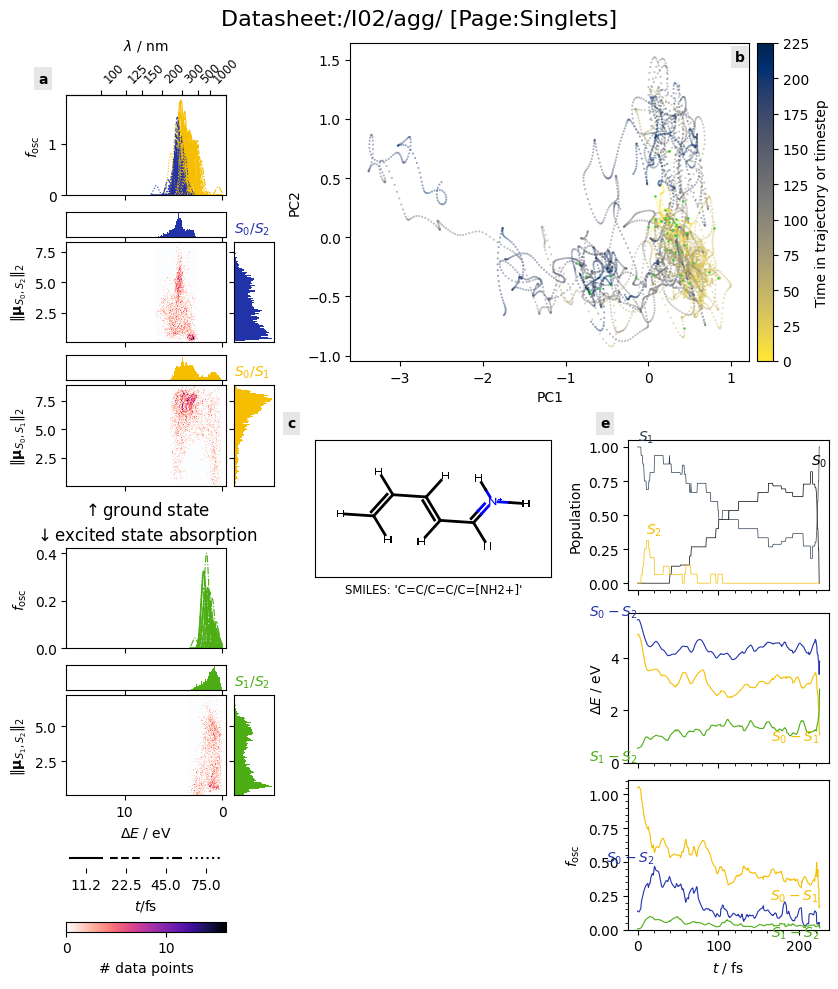

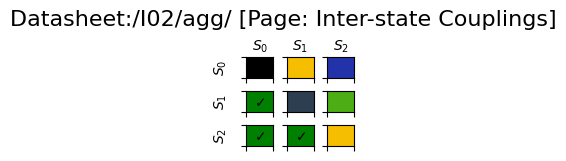

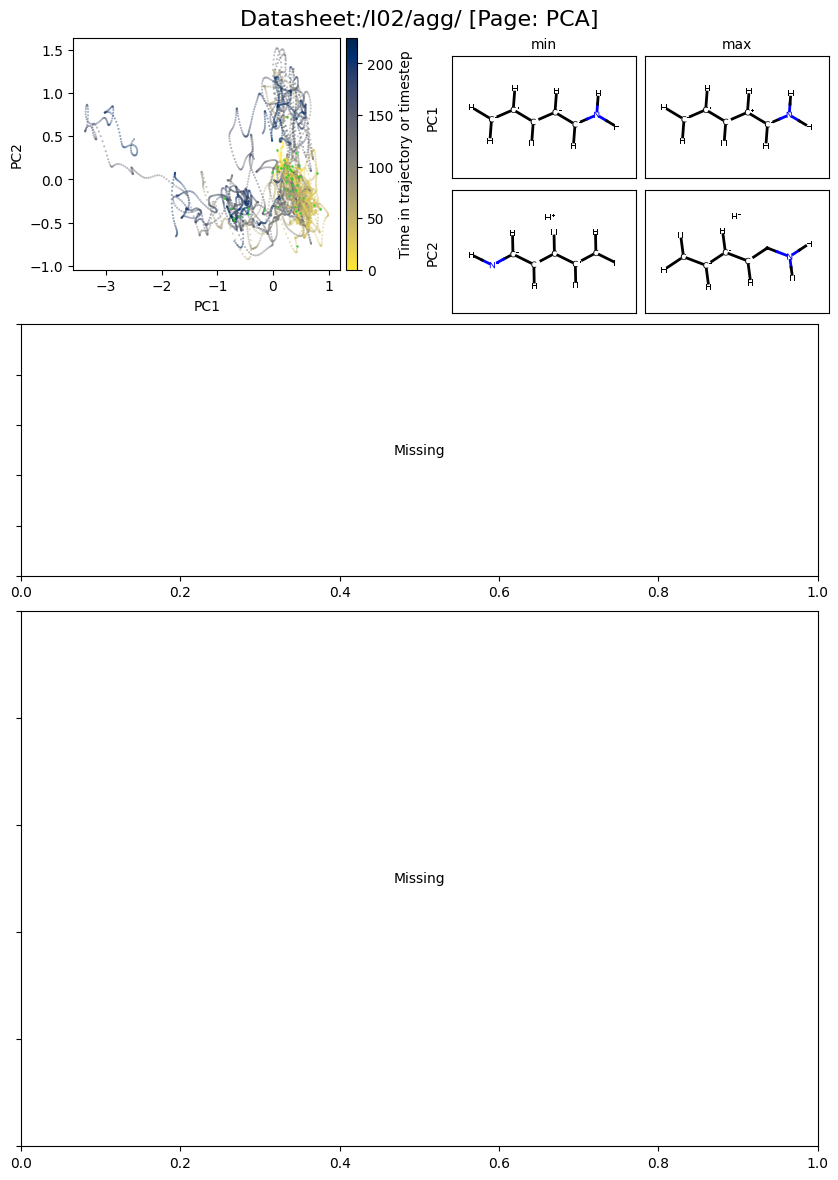

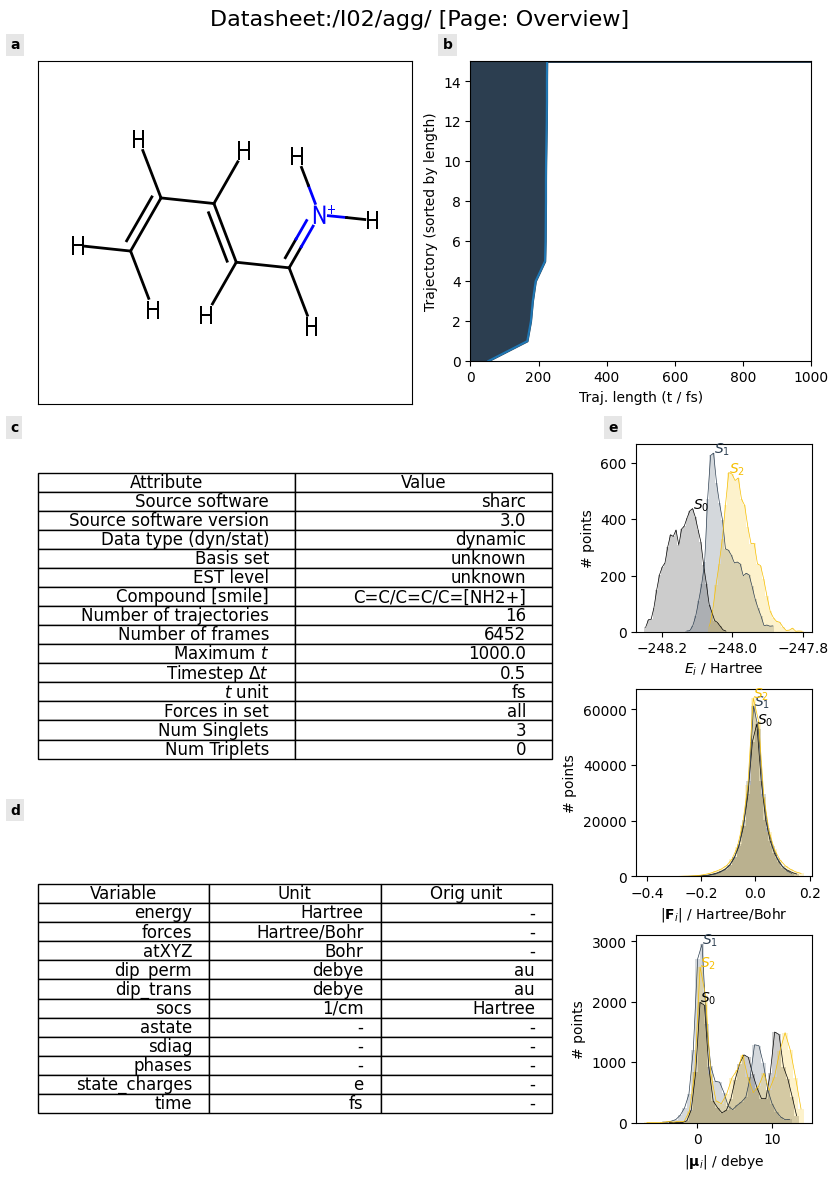

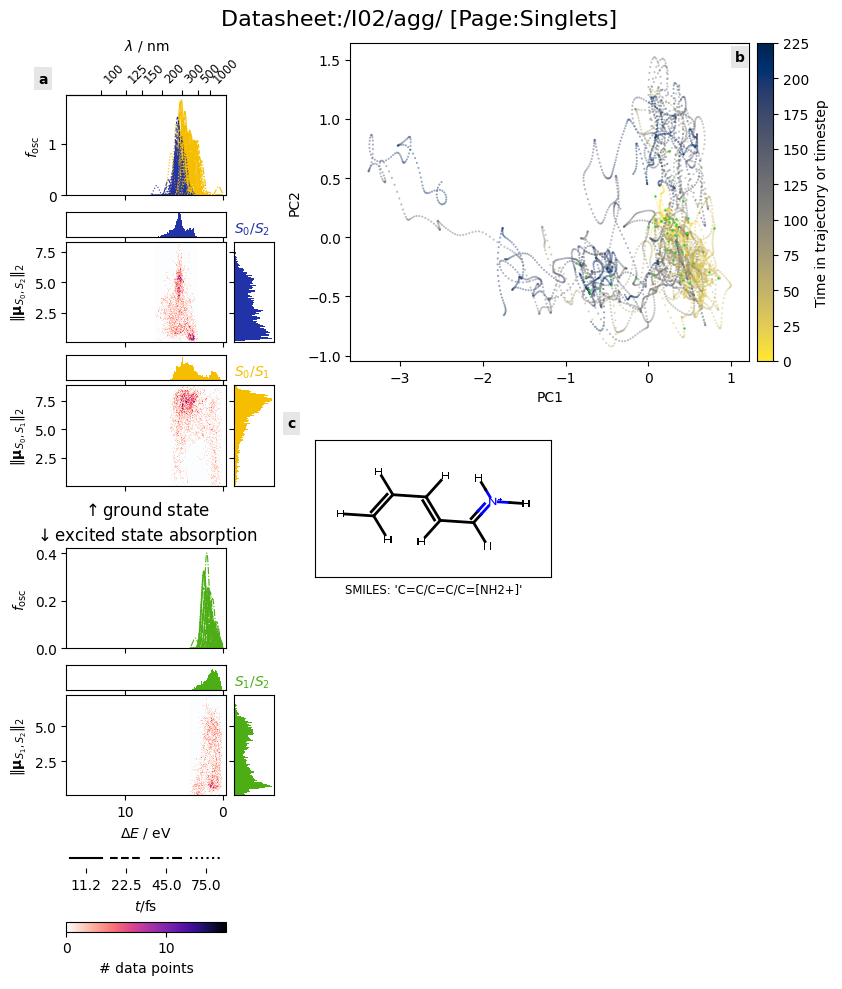

In [ ]:
from shnitsel.vis.datasheet import Datasheet

sheet = Datasheet(shnitsel_db_retinal)
# # shnitsel_db_triplet
# # sheet.datasheet_pages['root'].charge = 1
# # sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(
    include_meta_page=True, include_pca_page=True, path="./datasheet_retinal.pdf"
)

sheet = Datasheet(shnitsel_db_retinal_filtered)
# # shnitsel_db_triplet
# # sheet.datasheet_pages['root'].charge = 1
# # sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(
    include_meta_page=True,
    include_pca_page=True,
    path="./datasheet_retinal_filtered.pdf",
)

sheet = Datasheet(shnitsel_db_single_nx)
# shnitsel_db_triplet
# sheet.datasheet_pages['root'].charge = 1
# sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(include_meta_page=True, include_pca_page=True, path="./triplet_newtonx_.pdf")
# sheet.datasheet_pages

In [ ]:
from shnitsel.data.shnitsel_db.db_function_decorator import concat_subtree
from shnitsel.filtering.structure_selection import StructureSelection

concatted_tree = concat_subtree(shnitsel_db_single_nx)
frame = concatted_tree.isel(frame=0).squeeze()
sel = StructureSelection.init_from_dataset(frame, default_selection=['angles'])
# sel = sel.select_angles([(1,3,7),(0,4,8)])
# sel = sel.select_bonds([[2,6],[5,9]])

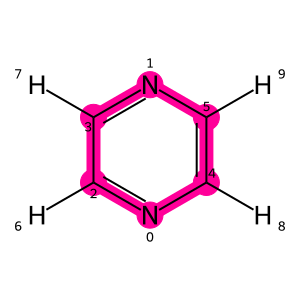

In [ ]:
sel2 = sel.select_bonds(["[#6][#7]"])
# sel = sel.select_atoms(["[#6]"])
sel2 = sel2.select_angles(["[#6]~[#6]~[#7]"])

# sel2.draw(flag_level=2)
sel2.draw(flag_level=3, highlight_color=(1, 0, 0.6))
# sel2.only('bonds')

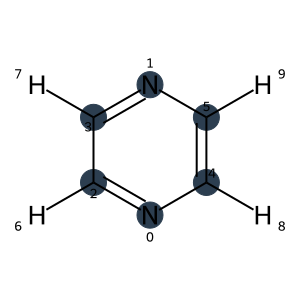

In [ ]:
from shnitsel.geo.geocalc_.bla_chromophor import get_max_chromophor_BLA

res_sel = sel.select_all(['atoms', 'bonds'])


# res = get_max_chromophor_BLA(concatted_tree.atXYZ, SMARTS='[#6,#7]~[#6,#7]~[#6,#7]~[#6,#7]~[#6,#7]~[#6,#7]')
# res
res_sel.draw(flag_level=1)
sel.select_all().select_atoms('[#6,#7]').draw(flag_level=1)

In [ ]:
%time sheet.calc_all()

CPU times: user 668 μs, sys: 994 μs, total: 1.66 ms
Wall time: 1.67 ms


In [ ]:
%time sheet.plot_per_state_histograms()

CPU times: user 13 μs, sys: 0 ns, total: 13 μs
Wall time: 18.4 μs


AttributeError: 'Datasheet' object has no attribute 'plot_per_state_histograms'

In [ ]:
%time sheet.plot_timeplots()

CPU times: user 10 μs, sys: 0 ns, total: 10 μs
Wall time: 14.3 μs


AttributeError: 'Datasheet' object has no attribute 'plot_timeplots'

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

CPU times: user 12 μs, sys: 0 ns, total: 12 μs
Wall time: 16.2 μs


AttributeError: 'Datasheet' object has no attribute 'plot_separated_spectra_and_hists'

CPU times: user 45.6 s, sys: 21.1 ms, total: 45.7 s
Wall time: 2.41 s


StopIteration: 

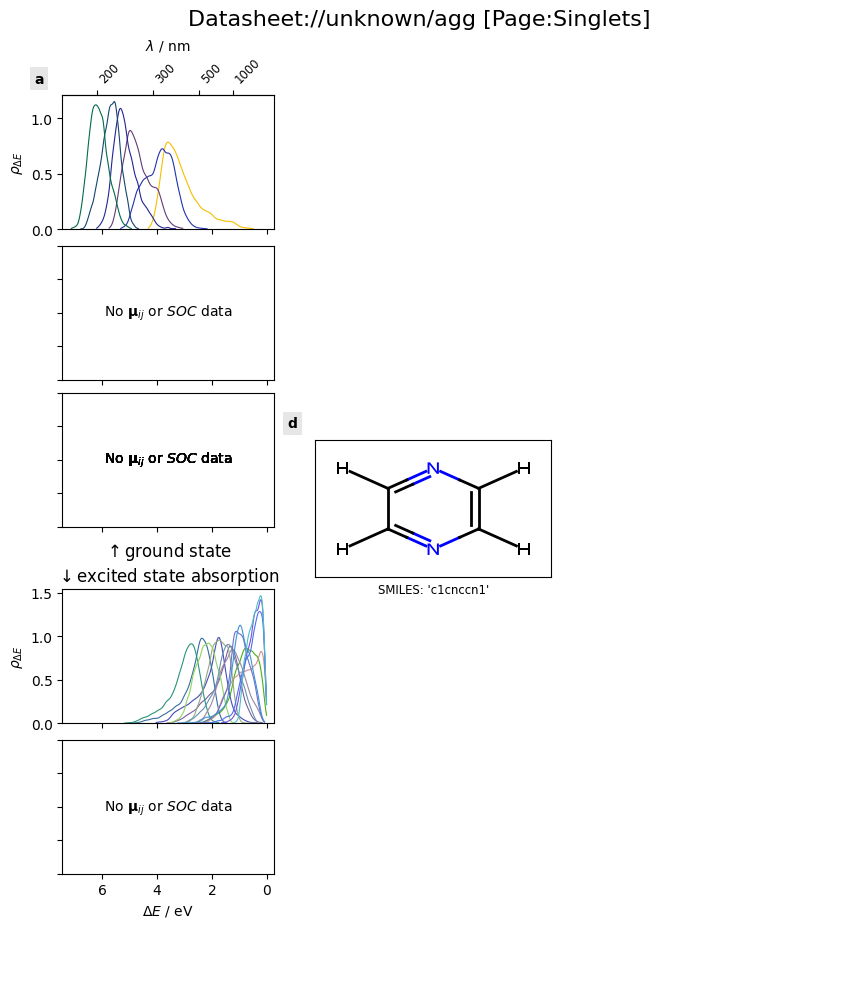

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)

    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')